In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
nivel_mar = pd.read_excel("Tide_19_años.xlsx", usecols=[1, 2])
viento = pd.read_excel("Olas en 2 puntos y Vientos en 1 punto.xlsx", sheet_name = "Wind TdF", usecols= [0, 1, 2])

## Ejercicio 1

• Los valores LAT y HAT. Usted cuenta con estos datos identifíquelos dentro de la serie Tide_19_años.xlsx.

In [3]:
LAT = nivel_mar[nivel_mar['Nivel del mar al NMM (m)'] == nivel_mar['Nivel del mar al NMM (m)'].min()]
LAT

,Fecha y hora,Nivel del mar al NMM (m)
10386,1981-03-08 18:00:00.001,-5.65504


In [4]:
HAT = nivel_mar[nivel_mar['Nivel del mar al NMM (m)'] == nivel_mar['Nivel del mar al NMM (m)'].max()]
HAT

,Fecha y hora,Nivel del mar al NMM (m)
1859,1980-03-18 11:00:00,5.29439


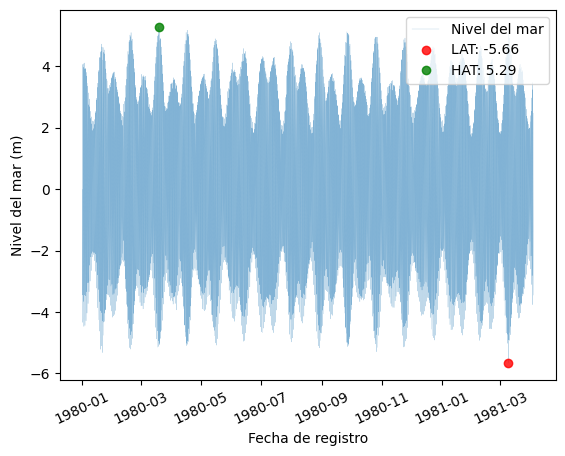

In [5]:
fig, ax = plt.subplots()
ax.plot(nivel_mar['Fecha y hora'][:11000], nivel_mar['Nivel del mar al NMM (m)'][:11000], linewidth=0.1)
ax.plot(LAT['Fecha y hora'], LAT['Nivel del mar al NMM (m)'], 'ro', alpha = 0.8)
ax.plot(HAT['Fecha y hora'], HAT['Nivel del mar al NMM (m)'], 'go', alpha = 0.8)

ax.set_ylabel("Nivel del mar (m)")
ax.set_xlabel("Fecha de registro")
plt.xticks(rotation=25)
ax.legend(["Nivel del mar", f"LAT: {round(LAT['Nivel del mar al NMM (m)'].values[0], 2)}", 
           f"HAT: {round(HAT['Nivel del mar al NMM (m)'].values[0], 2)}"], loc='upper right')

plt.show()

## Ejercicio 4
Considere la serie temporal de vientos de la zona en el archivo “Olas en 2 puntos y Vientos en 1 punto.xlsx”.
Dadas las limitaciones de la operación el nivel del mar debe superar -2 m (referido a NMM) y vientos menores
a 10 m/s. En base a la mencionada serie ¿cuál es el porcentaje del tiempo durante el que se esperan
condiciones de operación?

In [6]:
## Agregamos intensidad en el dataset de vientos

viento['Intensidad'] = np.sqrt(viento['u (m/s)']**2 + viento['v (m/s)']**2)

In [7]:
viento.head()

,Fecha y Hora,u (m/s),v (m/s),Intensidad
0,1979-01-01 00:00:00,4.429998,0.589999,4.469115
1,1979-01-01 06:00:00,6.659998,1.419999,6.809697
2,1979-01-01 12:00:00,5.109998,4.139998,6.576600
3,1979-01-01 18:00:00,4.519998,4.509998,6.385176
4,1979-01-02 00:00:00,2.729998,3.359998,4.329259


In [55]:
viento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52596 entries, 0 to 52595
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Fecha y Hora  52596 non-null  datetime64[ns]
 1   u (m/s)       52596 non-null  float64       
 2   v (m/s)       52596 non-null  float64       
 3   Intensidad    52596 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB


In [8]:
nivel_mar = nivel_mar.rename(columns={"Fecha y hora": "Fecha y Hora"})
nivel_mar['Fecha y Hora'] = pd.to_datetime(nivel_mar['Fecha y Hora'])
viento['Fecha y Hora'] = pd.to_datetime(viento['Fecha y Hora'])

var_metocean = pd.merge(viento, nivel_mar, on='Fecha y Hora', how='left')
var_metocean = var_metocean.dropna(subset=['Nivel del mar al NMM (m)'])

In [10]:
var_metocean

,Fecha y Hora,u (m/s),v (m/s),Intensidad,Nivel del mar al NMM (m)
1460,1980-01-01 00:00:00,4.959998,-8.650001,9.971164,-0.000847
1461,1980-01-01 06:00:00,14.659998,-2.550001,14.880123,-0.083288
1462,1980-01-01 12:00:00,17.859998,2.959998,18.103622,0.189977
1463,1980-01-01 18:00:00,15.699998,4.879998,16.440935,-1.285150
1464,1980-01-02 00:00:00,12.209998,4.389998,12.975213,1.460750
...,...,...,...,...,...
23133,1994-11-01 06:00:00,4.059998,2.229998,4.632114,2.410840
23134,1994-11-01 12:00:00,2.679998,-1.820001,3.239567,-2.168510
23135,1994-11-01 18:00:00,1.419999,-2.930001,3.255964,1.823130
23136,1994-11-02 00:00:00,-0.110001,-4.130001,4.131466,-1.587640


In [13]:
condiciones_aceptables = var_metocean[(var_metocean['Nivel del mar al NMM (m)'] > -2) & (var_metocean['Intensidad'] < 10)]
porcentaje = (len(condiciones_aceptables) / len(var_metocean)) * 100

print(f"El porcentaje del tiempo durante el cual se esperan condiciones de operación es: {round(porcentaje, 2)}%")

El porcentaje del tiempo durante el cual se esperan condiciones de operación es: 36.5%
